<a href="https://colab.research.google.com/github/Michelia235/Sentiment_Analysis/blob/Feature%2FAdd-code-project/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Tải bộ dữ liệu:**

In [3]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 98.4MB/s]


## **2. Đọc bộ dữ liệu:**

In [4]:
# Tải tập dữ liệu
import pandas as pd

df = pd.read_csv('/content/IMDB-Dataset.csv')
print("Số dòng sau khi tải dữ liệu:", len(df))

# Xóa các dòng trùng lặp
df = df.drop_duplicates()
print("Số dòng sau khi xóa dòng trùng lặp:", len(df))

Số dòng sau khi tải dữ liệu: 50000
Số dòng sau khi xóa dòng trùng lặp: 49582


In [7]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00


In [10]:
'''Ở đây chúng ta sẽ thực hiện làm sạch dữ liệu thông qua các bước như: xoá thẻ html, xoá dấu câu, xoá số, xoá các icon,...
'''

import re
import string
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

# Mở rộng các từ viết tắt
def expand_contractions(text):
    return contractions.fix(text)

# Hàm để làm sạch dữ liệu
def preprocess_text(text):
    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, "html.parser")  # Xóa thẻ HTML
    text = soup.get_text()
    text = expand_contractions(text)  # Mở rộng từ viết tắt

    emoji_clean = re.compile(
        r"["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_clean.sub('', text)
    text = re.sub(r'\.(?=\S)', '. ', text)  # Thêm khoảng trắng sau dấu chấm
    text = re.sub(r'http\S+', '', text)  # Xóa URL
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ])  # Xóa dấu câu và chuyển đổi về chữ thường
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()
    ])  # Lemmatize
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# In kích thước dữ liệu trước khi làm sạch
print("Kích thước dữ liệu trước khi làm sạch:", df.shape)

# Thực hiện làm sạch dữ liệu
df['review'] = df['review'].apply(preprocess_text)

# In kích thước dữ liệu sau khi làm sạch
print("Kích thước dữ liệu sau khi làm sạch:", df.shape)


Kích thước dữ liệu trước khi làm sạch: (49582, 2)
Kích thước dữ liệu sau khi làm sạch: (49582, 2)


## **3. Phân tích dữ liệu::**

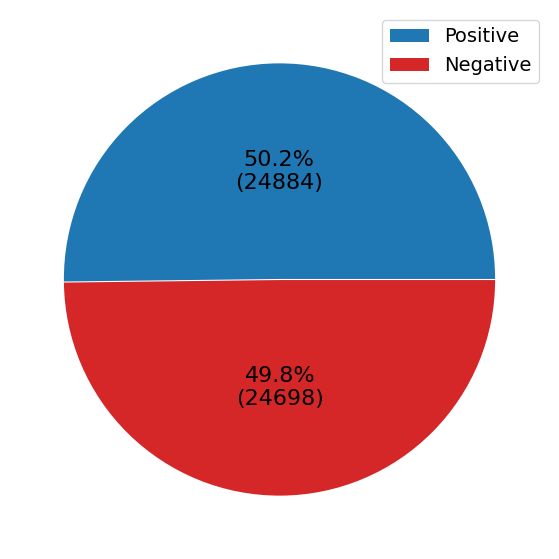

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo các tham số cho autocpt
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['positive', 'negative']

# Tạo biểu đồ pie
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,
    pctdistance=0.5,
    colors=[sns.color_palette()[0], 'tab:red'],
    textprops={'fontsize': 16}
)

# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()


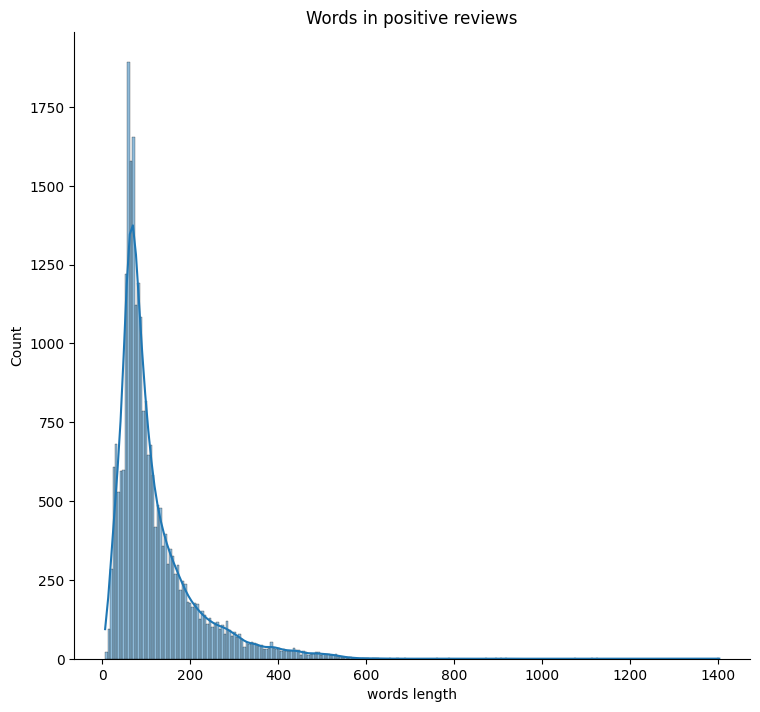

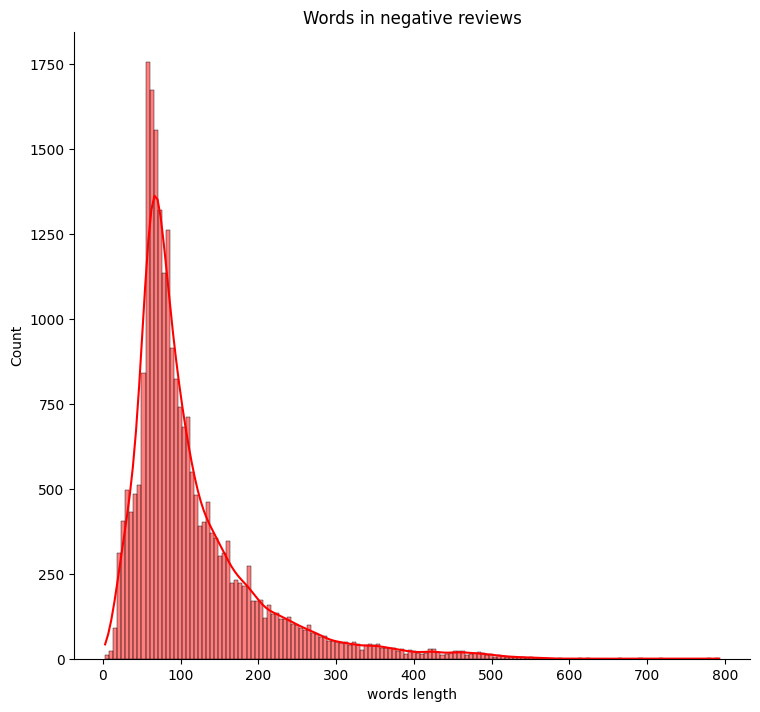

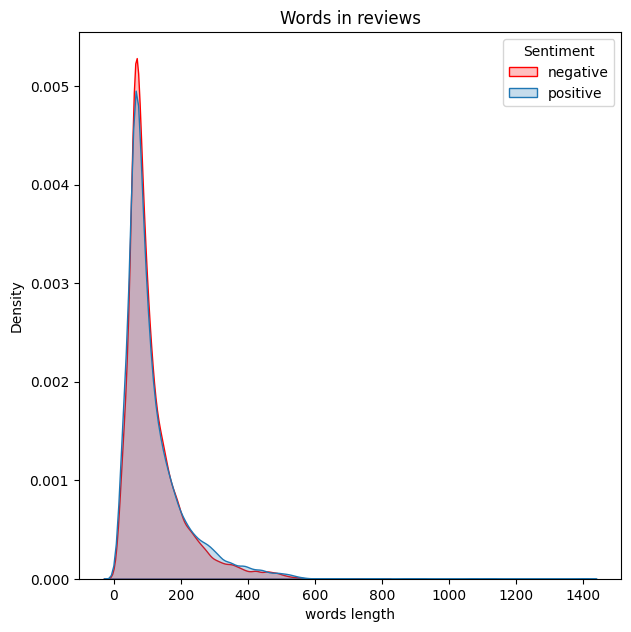

In [16]:
### Thống kê độ dài của các mẫu cho mỗi class.

words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

# Biểu đồ phân phối cho các bài đánh giá tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

# Biểu đồ phân phối cho các bài đánh giá tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
    palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

# Biểu đồ phân phối kernel cho số từ trong các bài đánh giá
plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp,
    x="words length",
    hue="sentiment",
    fill=True,
    palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)


## **4. Chia tập train và test:**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    test_size=0.2,
    random_state=42
)

##  **5. Biểu diễn văn bản thành vector:**

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

## **6. Huấn luyện và đánh giá mô hình:**

In [22]:
# Để huấn luyện mô hình Decision Tree, chúng ta sẽ sử dụng DecisionTreeClassifier():
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

y_pred = dt_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7175557124130282


In [23]:
# Để huấn luyện mô hình Random Forest, các bạn sẽ sử dụng RandomForestClassifier():
rf_classifier = RandomForestClassifier(
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)

y_pred = rf_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8438035696279117
